# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [67]:
#Importar bibliotecas e pacotes
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
#Carregar base
housing_raw = pd.read_csv('housing.csv')
housing_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A base não contém dados faltantes e as features estão categorizadas de maneira a representar os dados. Existe somente uma variável categórica que precisar ser transformada em dummy para aplicação no skl. 

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_raw['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing = pd.get_dummies(housing_raw, columns=['ocean_proximity'])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

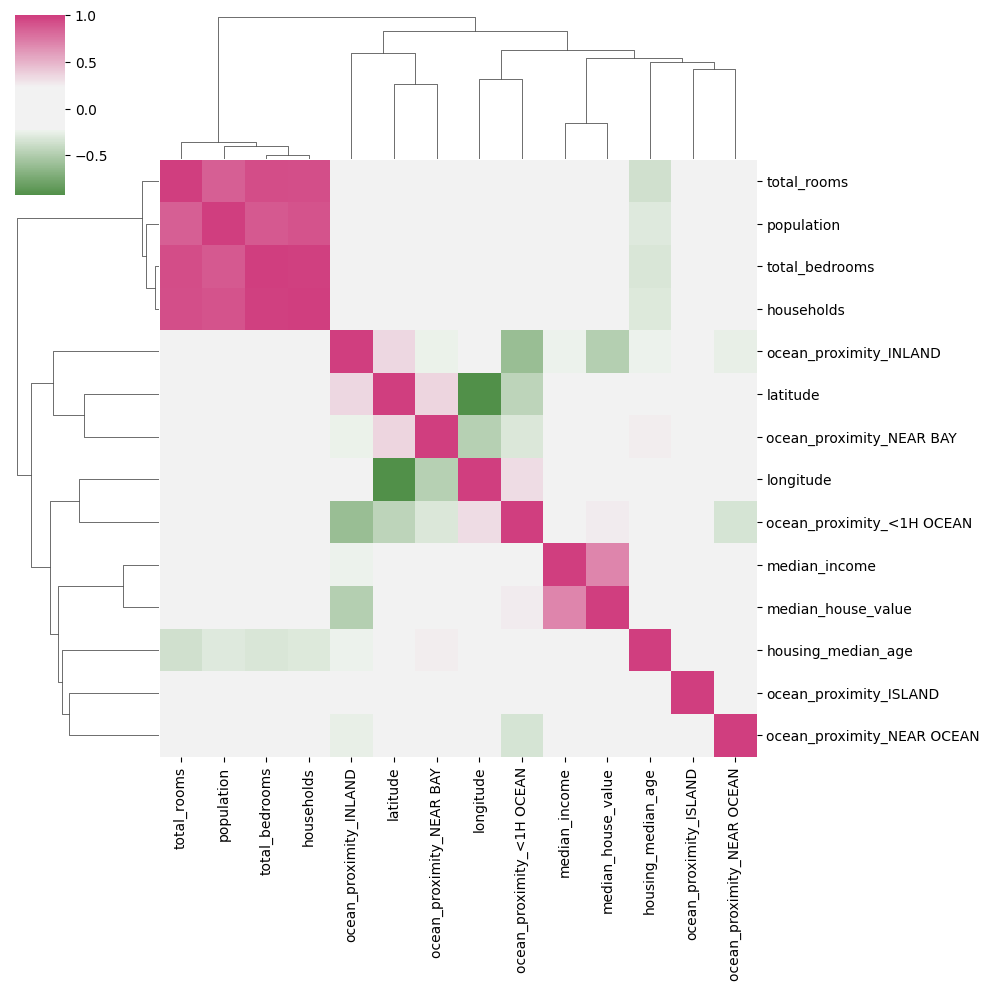

In [13]:
#Plotar 'Matriz de Correlação'
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(housing.corr(), figsize=(10, 10), center = 0, cmap=cmap)

A Matriz de Correlação revela algumas variáveis com potencial preditivo. As correlações são classificadas por intensidade, de acordo com o valor do coeficiente de correlação:

Correlação forte (próxima a 1,0): 
 - 'total_bedrooms' e 'households': Essas duas variáveis apresentam uma correlação muito forte, indicando que o número de total de quartos de cada casa e o número de domicílios estão altamente relacionados.

Correlação moderada a forte (entre 0,75 e 1,0):
 - 'total_rooms' e 'total_bedrooms': Existe uma correlação moderadamente forte entre o número de total de quartos de cada casa e o número total de ambientes de cada casa. Está é uma correlação lógica pois em qualquer cenário à medida que o número de total de quartos de uma casa aumenta aumenta, o número de total ambientes da mesma também irá a aumentar.
 - 'total_rooms' e 'households': Esta correlação moderada sugere que o número de total de quartos de cada casa geralmente significam mais domicílios na região e vice e versa. 
 - 'population' e 'households':A população tende a estar moderadamente correlacionada com o número de domicílios, o que faz sentido, pois mais domicílios geralmente indicam uma população maior.

Correlação entre 0,75 e 0,5:
 - 'population' e 'total_bedrooms': A população tem uma correlação moderada com o número de total de quartos de cada casa, sugerindo que, conforme a população aumenta, o número de quartos também aumenta, mas essa relação é um pouco menos direta. 

 - 'total_rooms' e 'population': Há uma correlação moderada entre o número de ambientes totais e a população, indicando que regiões onde as casa têm um maior númro de ambientes tendem a ter uma população maior.

Correlação entre 0,5 e 0,25:
- 'median_income' e 'median_house_value': Essa relação moderada indica que há uma ligação clara entre a renda média e o valor mediano das casas, sugerindo que rendas mais altas geralmente estão associadas a valores mais altos de imóveis.

Estas correlações podem ser indicativas de boas variáveis preditivas em modelos de machine learning.

### 3. Separe os dados em validação e teste

In [19]:
#Definir 'X' - variáveis explicativas
X = housing.drop(columns = ['median_house_value']).copy()

In [21]:
#Definir 'y' - variável resposta
y = housing['median_house_value']

In [51]:
#Separar os dados em conjunto de validação e conjunto teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [53]:
#Gerar árvores 
regr_1 = DecisionTreeRegressor(max_depth=2)#Árvore 1 com profundidade 2
regr_2 = DecisionTreeRegressor(max_depth=8)#Árvore 2 com profundidade 8

#Treinar árvores
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

#Fazer previsões
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [55]:
#Calcular MSE
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

template = "O MSE da árvore com profundidade = {0} é: {1:.2f}"

print(template.format(regr_1.get_depth(), mse1).replace(".",","))
print(template.format(regr_2.get_depth(), mse2).replace(".",","))

O MSE da árvore com profundidade = 2 é: 6717612809,38
O MSE da árvore com profundidade = 8 é: 3810560664,90


In [43]:
housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Os MSEs das árvores estão bastante altos em relação a escala de valores da base de dados. O que pode indicar que o modelo não esta gerando boas previsões. 

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Entre as árvores com profundidade 2 e 8, a árvore de profundidade 8 seria mais adequada porém ainda assim o MSE é bastante elevado.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

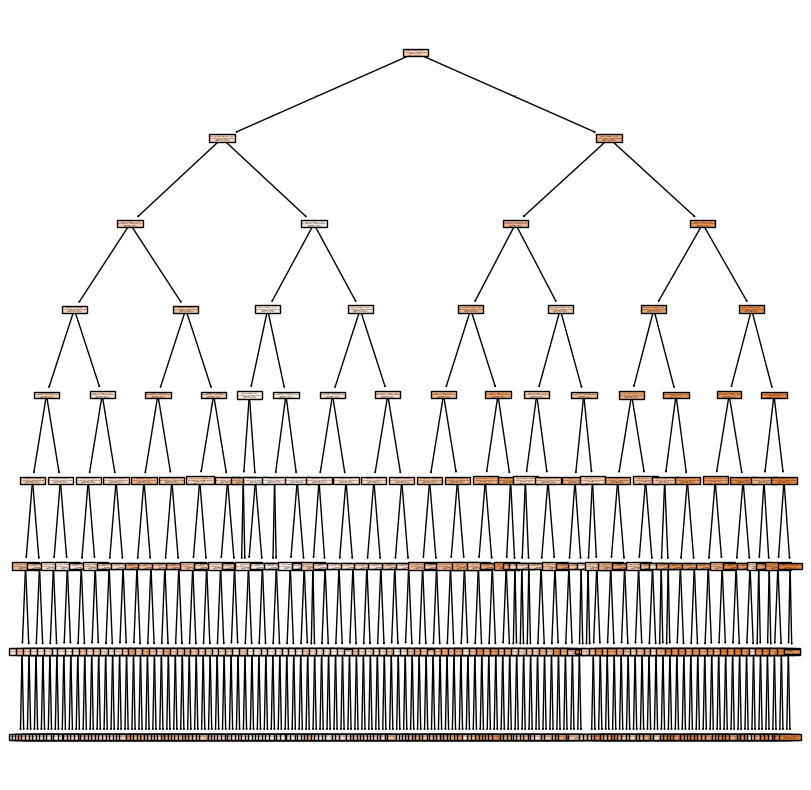

In [71]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,  
                    filled=True) 